### Tutorial 1: Descriptive Statistics
This tutorial will teach you how to compute and understand descriptive statistics in Python using the popular libraries `pandas` and `numpy`. Descriptive statistics summarize and provide insights into a dataset's key characteristics, such as the central tendency, spread, and overall distribution.

**What are Descriptive Statistics?**
Descriptive statistics are used to describe and summarize data. Some common descriptive statistics include:
- Measures of central tendency: Mean, median, and mode
- Measures of variability: Range, variance, and standard deviation
- Shape of the distribution: Skewness and kurtosis

| **Statistic**            | **Type**                     | **Description**                                                                 | **Formula**                                                                                           |
|--------------------------|------------------------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Mean**                 | Central Tendency             | The average of the dataset, calculated as the sum of all values divided by the number of values. | $ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $                                                            |
| **Median**               | Central Tendency             | The middle value of the dataset when sorted in ascending or descending order.    | No single formula. If $n$ is odd, median = middle value. If $n$ is even, median = $ \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} $ |
| **Mode**                 | Central Tendency             | The value that occurs most frequently in the dataset.                           | No single formula. The value $x_{\text{mode}}$ that appears most often.                             |
| **Range**                | Variability                  | The difference between the maximum and minimum values in the dataset.           | $ \text{Range} = \max(x) - \min(x) $                                                                  |
| **Variance**             | Variability                  | The average of the squared differences from the mean, indicating how spread out the data is. | $ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $                                            |
| **Standard Deviation**   | Variability                  | The square root of the variance, representing the average distance of data points from the mean. | $ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2} $                                      |
| **Skewness**             | Shape of Distribution        | A measure of the asymmetry of the data distribution; indicates whether the data has a long tail to the left or right. | $ \text{Skewness} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{\sigma} \right)^3 $       |
| **Kurtosis**             | Shape of Distribution        | A measure of the "tailedness" of the data distribution, indicating whether the data has heavy or light tails compared to a normal distribution. | $ \text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{\sigma} \right)^4 - 3 $   |



In this tutorial, we will apply these statistical measures to a dataset stored in a database (mmdt.db3) and show how to compute them using Python.

### Install Required Libraries

In this tutorials, we will use `numpy`, `pandas`, `sqlite3`, `sqlachemy`. To install these libraries, you can use `pip`:

```bash
pip install numpy pandas sqlite3 sqlachemy

```

In [1]:
import sqlite3
import pandas as pd

db_path = './database/mmdt.db3'

conn = sqlite3.connect(db_path)
query = """
        SELECT 
                p.ID, 
                COALESCE(p.Gender, b.Gender) as gender,
                COALESCE(p.BOD, b.BOD) as birth_year,
                COALESCE(p.Pre_Knowledge_Data, b.Pre_Knowledge_Data) as pre_score,
                COALESCE(a.Rate, '0%') as attendance
                FROM participants as p
                LEFT JOIN bhutan as b                
                ON p.ID = b.ID
                LEFT JOIN attendance as a
                ON LOWER(a.ID) = LOWER(p.ID);
        """

df = pd.read_sql_query(query, conn)
conn.close()

df['attendance'] = df['attendance'].apply(lambda data:data.replace('%',''))
df['attendance'] =  df['attendance'].astype('float64')

##### Central Tendency
- `Mean`: The average of the data.
- `Median`: The middle value in sorted data.
- `Mode`: The most frequent value.

#####  Variability
- `Variance`: Measures the spread of the data.
- `Standard Deviation`: The square root of the variance.
- `Range`: Difference between max and min values.

In [2]:
print(f"Average socre: {df['pre_score'].mean()}")
print(f"Median socre: {df['pre_score'].median()}")
print(f"Most freuqently occured: {df['gender'].mode()[0]}")


print(f"Variance: {df['pre_score'].var()}")
print(f"Standard deviation: {df['pre_score'].std()}")
print(f"Maximum Pre Score: {df['pre_score'].max()}")
print(f"Minimum Pre Score: {df['pre_score'].min()}")
print(f"Range: {df['pre_score'].max()-df['pre_score'].min()}")

df.describe()

Average socre: 1.72
Median socre: 2.0
Most freuqently occured: Female
Variance: 1.0117171717171718
Standard deviation: 1.0058415241563512
Maximum Pre Score: 4.0
Minimum Pre Score: 0.0
Range: 4.0


,pre_score,attendance
count,100.000000,100.000000
mean,1.720000,77.370000
std,1.005842,32.213196
min,0.000000,0.000000
25%,1.000000,62.750000
50%,2.000000,92.000000
75%,2.000000,100.000000
max,4.000000,100.000000


| **Statistic**          | **Skewness**                                | **Kurtosis**                                |
|------------------------|---------------------------------------------|---------------------------------------------|
| **Right-skewed**        | Positive skew, mean > median                | Leptokurtic (Heavy tails, sharp peak)      |
| **Left-skewed**         | Negative skew, mean < median                | Platykurtic (Light tails, flat peak)       |
| **Symmetric (Normal)**  | Skewness ≈ 0                                | Mesokurtic (Kurtosis ≈ 3)                  |


skewnness for pre_score is 0.16
skewnness for attendance is -1.27


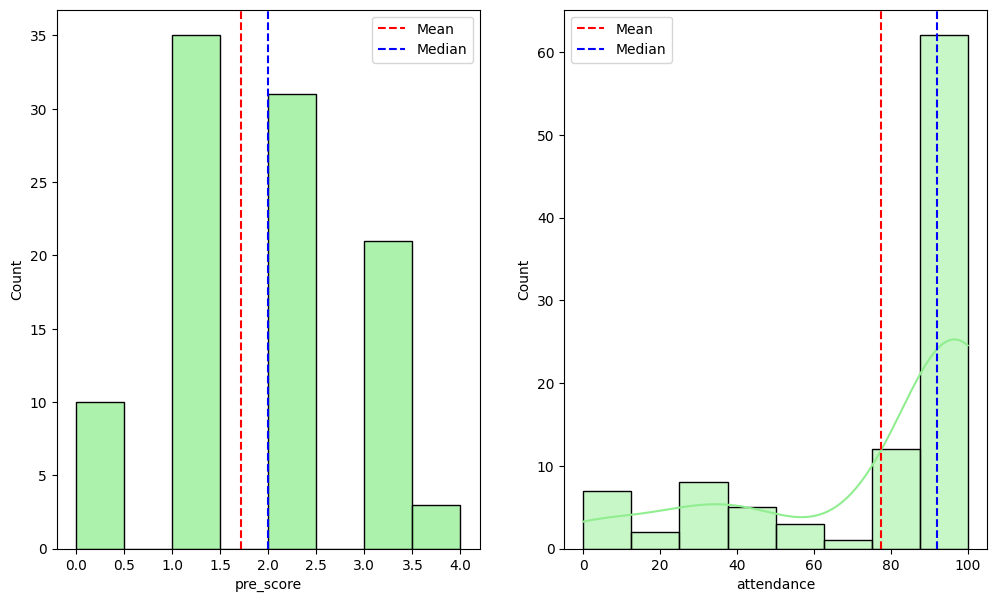

In [ ]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

score_skew = skew(df['pre_score'])
attendance_skew = skew(df['attendance'])
print(f'skewnness for pre_score is {np.round(score_skew,2)}')
print(f'skewnness for attendance is {np.round(attendance_skew,2)}')

score_kurtosis = kurtosis (df['pre_score'])
attendance_kurtosis  = kurtosis (df['attendance'])
print(f'kurtosis  for pre_score is {np.round(score_kurtosis ,2)}')
print(f'kurtosis  for attendance is {np.round(attendance_kurtosis ,2)}')

fig, axes = plt.subplots(1,2, figsize = (12,7))
sns.histplot(df, x = 'pre_score', binwidth = 0.5, ax = axes[0], color = 'lightgreen')
axes[0].axvline(df['pre_score'].mean(), color = 'red', linestyle = '--', label = 'Mean')
axes[0].axvline(df['pre_score'].median(), color = 'blue', linestyle = '--', label = 'Median')
axes[0].legend()

sns.histplot(df, x = 'attendance', ax = axes[1], kde = True, color = 'lightgreen')
axes[1].axvline(df['attendance'].mean(), color = 'red', linestyle = '--', label = 'Mean')
axes[1].axvline(df['attendance'].median(), color = 'blue', linestyle = '--', label = 'Median')
axes[1].legend()

plt.show()

#### Probability Mass Function (PMF)
A Probability Mass Function (PMF) is a fundamental concept in probability theory that describes the probability of discrete random variables taking on specific values.

In simple terms:
- It tells you how likely each value in a `discrete` dataset or variable is to occur.
- The sum of all probabilities in a PMF is always equal to 1.
---

#### Probability Density Function (PDF)

A Probability Density Function (PDF) is a key concept in probability theory that describes the likelihood of continuous random variables taking on values within a given range.

In Simple Terms:
- It tells you how dense the probabilities are around a specific value for a `continuous` variable.
- The total area under the PDF curve is always equal to 1.

`Key Characteristics of a PDF`:
1. **No Exact Probabilities at Points**:  
   Unlike a PMF, a PDF cannot provide the probability of a single value (e.g., \( $P(X = x) = 0$ \)) since the probability at a specific point in a continuous distribution is infinitesimally small.

2. **Integration for Ranges**:  
   Probabilities are determined by integrating the PDF over a range, such as:  
   $P(a \leq X \leq b) = \int_a^b f(x) \, dx$


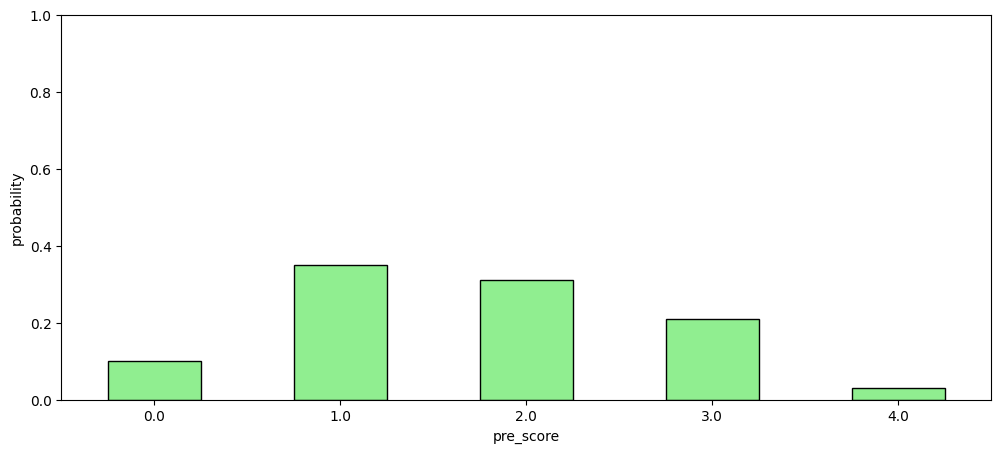

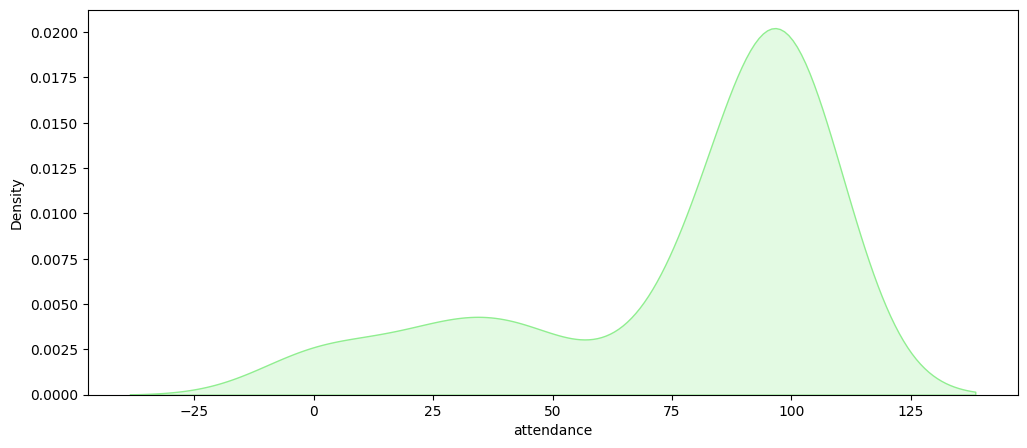

In [58]:
pmf = df['pre_score'].value_counts(normalize = True).sort_index()

plt.figure(figsize = (12,5))
pmf.plot(kind = 'bar', color = 'lightgreen', edgecolor = 'black')
plt.xticks(rotation = 0)
plt.ylabel('probability')
plt.ylim([0, 1])
plt.show()


plt.figure(figsize = (12,5))
sns.kdeplot(df['attendance'], fill = True, color = 'lightgreen')
plt.xticks(rotation = 0)
plt.ylabel('Density')
plt.show()



#### Box-plot
A boxplot (also known as a box-and-whisker plot) is a useful visualization tool to summarize the distribution of a dataset, particularly for continuous data. It provides insights into the central tendency, variability, and the presence of outliers in the data. While histograms, PMFs, and PDFs show different aspects of data distribution, boxplots offer a compact summary and are especially useful for comparing distributions across different groups.

**Key Features of a Boxplot**:
- `Median` (Q2): The line inside the box represents the median (50th percentile) of the dataset, which indicates the central value.
- `Interquartile` Range (IQR): The box itself spans from the first quartile (Q1) to the third quartile (Q3), covering the middle 50% of the data.
- `Whiskers`: The lines extending from the box (whiskers) typically represent the range of data excluding outliers, often defined as values within 1.5 times the IQR from Q1 and Q3.
- `Outliers`: Data points outside the whiskers are often marked individually as outliers (points more than 1.5 * IQR above Q3 or below Q1).
- `Comparison` Across Groups: Boxplots are particularly useful for comparing distributions across multiple categories or groups.



In [66]:
df['gender'] = df['gender'].str.strip()
df['gender'] = df['gender'].str.title()
df['gender'] = df['gender'].apply(lambda sex: 'Male' if sex == 'Man' else sex)
df['gender'].value_counts()

gender
Female    73
Male      27
Name: count, dtype: int64

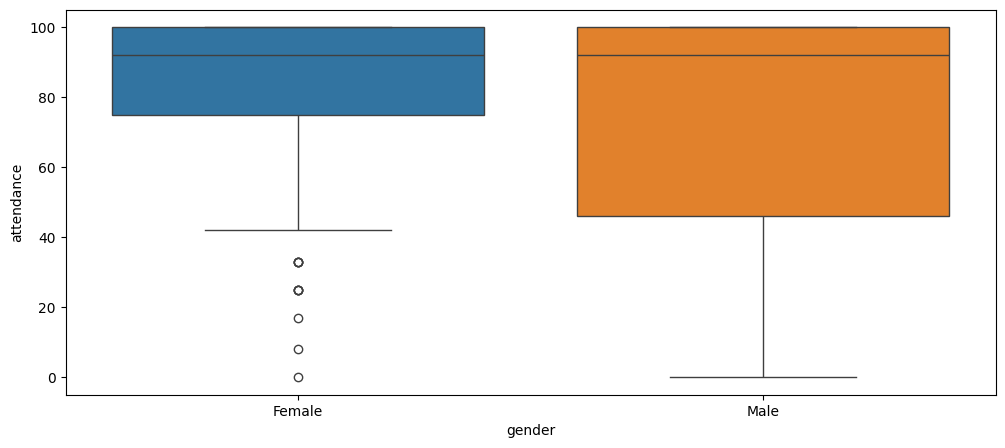

In [69]:
plt.figure(figsize = (12,5))
sns.boxplot(data = df, y = 'attendance', hue = 'gender', x ='gender')
plt.show()